##  [Lab 9] Clustering
### 0. Introduction
> **Clustering** in machine learning is a technique used to group similar data points together based on certain features or characteristics. It aims to discover underlying patterns or structures within a dataset without the need for labeled data. Common algorithms for clustering include K-means, hierarchical clustering, and DBSCAN. The effectiveness of clustering depends on factors such as the choice of distance metric, the number of clusters, and the quality of the data preprocessing. Clustering finds applications in various fields including image segmentation, customer segmentation, anomaly detection, and recommendation systems. This technique is defined under the branch of *unsupervised learning*, which aims at gaining insights from unlabelled data points.  It evaluates the similarity based on a metric like *Euclidean distance*, *Cosine similarity*, *Manhattan distance*, etc. and then group the points with highest similarity score together. On the figure below, we can see that the data points are grouped into three circular clusters formed on the basis of distance.

 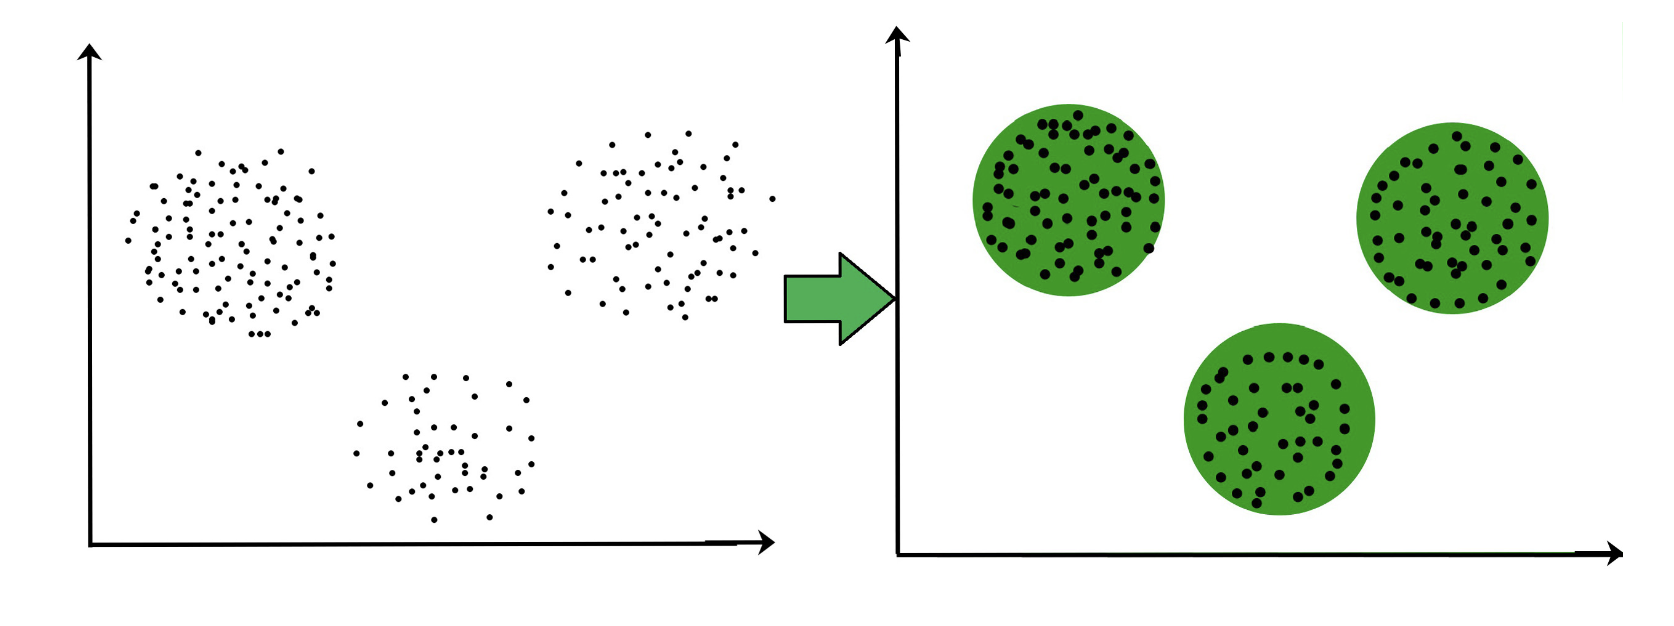



---

**The goal** of this laboratory session is to implement a K-means clustering algorithm, alongside with the elbow method.

---


#### Dataset Explanation
> This [week's dataset](https://drive.google.com/file/d/1bA8CqJ7shFPZFxrvjyl4Kz6SnPMwm_sR/view?usp=drive_link) contains 863 rows and  two columns (0 and 1) , which represent scaled customers' rates. In this case, every customer rate is represented in the form of 2D data, which makes it easy for us to put it in the coordinate system and calculate the Euclidean distance for the clustering purposes. The dataset can be seen on the figure below. You can either download it from the Google Drive link above or from the [LMS](https://learning.ibu.edu.ba/mod/resource/view.php?id=83277).

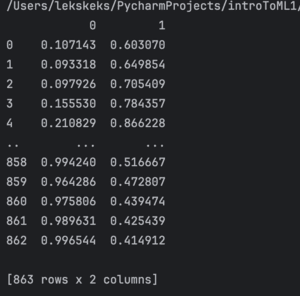

In order to analyze and work with our dataset, firstly, we need to read its content. You can use the following code snippet. Additionally, you can use the helper *is_number* function, to handle possible non-numeric values in the columns.

In [1]:
def is_number(s):
    if s is None: return False
    try:
        complex(s)
    except ValueError:
        return False

    return True
def read_file(file_path, offset=1):
    try:
        with open(file_path, 'r') as file:
            data = []
            lines = file.readlines()

            keys = lines[0].split(',')
            for i in range(offset, len(lines)):
                data_row = [
                    float(cell.strip('\n')) if is_number(cell.strip('\n')) else cell.strip('\n')
                    for cell in lines[i].split(',')
                ]
                data.append(data_row)
            return data
    except FileNotFoundError:
        raise RuntimeError("File not found.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")

In [2]:
data = read_file('sample_data/kmeans.csv')
print(data)

[[0.107143, 0.60307], [0.093318, 0.649854], [0.0979263, 0.705409], [0.15553, 0.784357], [0.210829, 0.866228], [0.328341, 0.929094], [0.429724, 0.934942], [0.620968, 0.934942], [0.756912, 0.910088], [0.819124, 0.879386], [0.809908, 0.836988], [0.75, 0.819444], [0.773041, 0.854532], [0.770737, 0.88962], [0.766129, 0.899854], [0.779954, 0.835526], [0.75, 0.791667], [0.761521, 0.765351], [0.814516, 0.832602], [0.814516, 0.885234], [0.563364, 0.921784], [0.49424, 0.899854], [0.480415, 0.863304], [0.448157, 0.819444], [0.425115, 0.857456], [0.450461, 0.899854], [0.510369, 0.937865], [0.498848, 0.945175], [0.351382, 0.934942], [0.273041, 0.901316], [0.233871, 0.861842], [0.215438, 0.858918], [0.134793, 0.861842], [0.0748848, 0.872076], [0.0587558, 0.872076], [0.10023, 0.83845], [0.120968, 0.83114], [0.132488, 0.813596], [0.137097, 0.774123], [0.116359, 0.749269], [0.104839, 0.727339], [0.107143, 0.699561], [0.0910138, 0.65424], [0.0679724, 0.633772], [0.0679724, 0.623538], [0.093318, 0.585526

### 1. K-means clustering

> K means clustering is a clustering technique that assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster. In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.

#### Centroid Initialization
> During the lecture, we have mentioned that every cluster contains its centroid. Initially, we will determine the centroids randomly. The initialize_centroid method takes two parameters: *the whole dataset* and the *number of clusters k*. The method works in the following way:

*   Randomly select k unique indices from the range of the data point indices from the original dataset. You can use the *random.sample* method.
*   Use the selected indices to create a list of initial centroids.

*   Return the list of initial centroids.
    



In [3]:
import random

def initialize_centroids(data, k):
  pass

In [4]:
import random

def initialize_centroids(data, k):
    centroid_indices = random.sample(range(len(data)), k)
    centroids = [data[i] for i in centroid_indices]

    return centroids

In [6]:
initialize_centroids(data,1)

[[0.332949, 0.779971]]

In [7]:
initialize_centroids(data,10)

[[0.648618, 0.739035],
 [0.697005, 0.705409],
 [0.922811, 0.49386],
 [0.897465, 0.819444],
 [0.673963, 0.524123],
 [0.503456, 0.914474],
 [0.524194, 0.934942],
 [0.775346, 0.684942],
 [0.650922, 0.59576],
 [0.577189, 0.796053]]

#### Euclidean Distance

> This method should return the Euclidean distance between two coordinates in the system. It takes two points as the parameters (which are represented as two lists), calculates the distance between them and returns it. The formula can be shown on the figure below. You have the *math* module imported already, so you can use the sqrt & pow functions.  The cost function is the squared distance between all the points to their closest cluster center.



 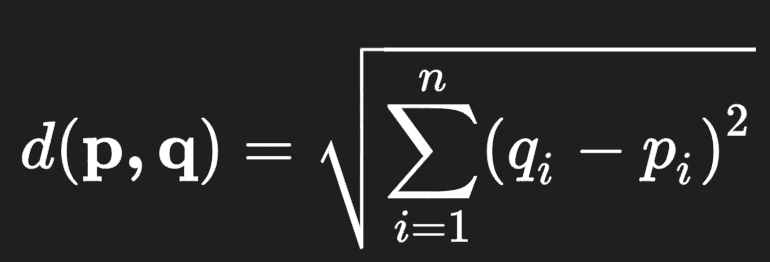

In [8]:
import math

def euclidean_distance(p1, p2):
  pass

In [9]:
import math

def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

In [12]:
p1 = data[0]
p2 = data[3]

distance = euclidean_distance(p1, p2)
print(distance)

0.18763336094095845


#### Forming the clusters & assigning the data

> This method should assign each data point to the nearest centroid, which will form the clusters. As the input parameters, we take the whole dataset and the centroids we calculated in one of the methods above. It should return the list, where the values should be the number of cluster for every data point, to which that data point is assigned.  The process works in the following way:


*   For each data point, calculate the Euclidean distance between itself and the centroids.

*   Assign the data point to the cluster of nearest centroid, or, where the distance is the smallest. Append the clusters list with the index of the cluster for the appropriate data point and return the clusters list.



In [13]:
def assign_to_clusters(data, centroids):
  pass

In [14]:
def assign_to_clusters(data, centroids):
    clusters = []
    for point in data:
        min_distance = float('inf')
        closest_centroid = None
        for i, centroid in enumerate(centroids):
            distance = 0
            for j, feature in enumerate(point):
                distance += (feature - centroid[j]) ** 2
            distance = distance ** 0.5
            if distance < min_distance:
                min_distance = distance
                closest_centroid = i
        clusters.append(closest_centroid)
    return clusters

In [21]:
centroids=initialize_centroids(data,3)
assign_to_clusters(data,centroids)

[2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


#### Updating the centroids
> *Update_centroids* function should update the centroids based on the current cluster assignments. It takes the whole dataset, clusters and the number of clusters as the parameters. This method should return the list of updated centroids. The process is the following:


*   Initialize the empty list for the centroids.
*   Iterate over each cluster to collect the points assigned to that cluster.
*   For each data point, calculate its mean in the current cluster, to obtain the new centroid value.
*   Append the new centroid value to the centroid list.




In [18]:
def update_centroids(data, clusters, k):
  pass

In [26]:
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroid = [sum(x) / len(cluster_points) for x in zip(*cluster_points)]
        centroids.append(centroid)
    return centroids

In [27]:
clusters = assign_to_clusters(data,centroids)
update_centroids(data,clusters,3)

[[0.6899221994535519, 0.7737884945355198],
 [0.5178140996441278, 0.5763444306049823],
 [0.1686507810185185, 0.7130793657407409]]

#### K-means clustering method



> This method should perform the k-means clustering algorithm. It takes dataset, number of clusters and the max. number of iterations as the parameters. The function should return the list of cluster assignments and the final centroids. The process is the following:


*   Initialize the centroids using the aforementioned function.

*   While the do not reach the maximum number of iterations, assign every data point to the nearest centroid, using *assing_to_clusters* method.
*   Update the centroids using the *update_centroids* function.


*   Check if there is any change in the centroids (if new centroids are equal to the old ones). If not, you can break the loop.
*   Repeat until we reach the number of *max_iterations*.



In [24]:
def k_means(data, k, max_iterations = 1000):
  pass

In [37]:
import random

def kmeans(data, k, max_iterations=1000):
    centroids = [[0 for _ in range(len(data[0]))] for _ in range(k)]
    for i in range(k):
        index = random.randint(0, len(data) - 1)
        centroids[i] = data[index]

    clusters = [[] for _ in range(k)]

    for iteration in range(max_iterations):
        for point in data:
            min_distance = float('inf')
            cluster_index = -1
            for i, centroid in enumerate(centroids):
                distance = sum((a - b) ** 2 for a, b in zip(point, centroid)) ** 0.5
                if distance < min_distance:
                    min_distance = distance
                    cluster_index = i
            clusters[cluster_index].append(point)

        new_centroids = [[0 for _ in range(len(data[0]))] for _ in range(k)]
        for i, cluster in enumerate(clusters):
            if cluster:
                centroid = [sum(x) / len(x) for x in zip(*cluster)]
                new_centroids[i] = centroid

        if new_centroids == centroids:
            break

        centroids = new_centroids

    return centroids, clusters

In [38]:
kmeans(data,3,max_iterations=1000)

([[1.0, 2.0],
  [3.9994997498749374, 4.999499749874937],
  [7.998500749625188, 8.998500749625187]],
 [[[1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2],
   [1, 2]

To test your *k_means* method, just call it with our dataset and the k value (choose by yourself) as the parameters.

#### Plotting the clusters
> Try to visualize the clusters and centroids using the matplotlib library and the scatter plot.
For a bit of a help, you can visit the following [matplotlib documentation link](https://matplotlib.org/).

> *Assistant's note*: Example of a graph is shown below :)

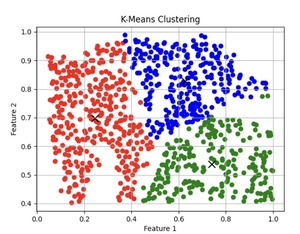

In [39]:
import matplotlib.pyplot as plt

def plot_clusters(data, clusters, centroids):
  pass

In [64]:
import matplotlib.pyplot as plt

def plot_clusters(data, clusters, centroids):
    fig, ax = plt.subplots()

    for i in range(len(centroids)):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        x_coords = [point[0] for point in cluster_points]
        y_coords = [point[1] for point in cluster_points]
        ax.scatter(x_coords, y_coords, label=f"Cluster {i}", alpha=0.5)

    x_coords = [point[0] for point in centroids]
    y_coords = [point[1] for point in centroids]
    ax.scatter(x_coords, y_coords, marker='*', s=200, c='red', label='Centroids')

    ax.set_title("Clusters and Centroids")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

    plt.legend()

    plt.show()

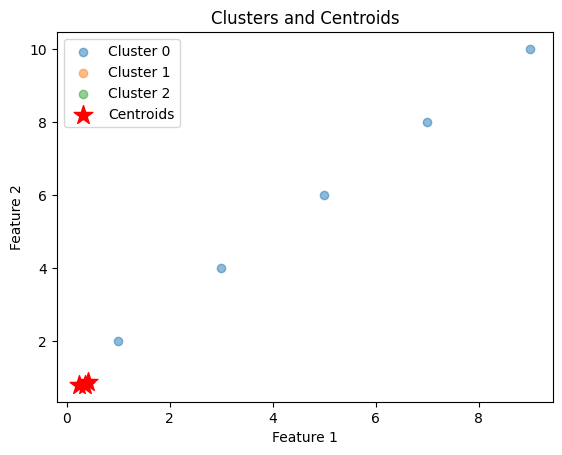

In [65]:
plot_clusters(data, clusters, centroids)

#### Elbow method
> So far, we have been choosing the number of clusters arbitrarily. Now, we will implement a method that tells us how many clusters we should have for a specific data. Elbow method involves plotting the variance explained by different numbers of clusters and identifying the “elbow” point, where the rate of variance decreases sharply levels off, suggesting an appropriate cluster count for analysis or model training.

##### Calculate the sum of squares within the clusters (WCSS)
> This method initializes an empty list *wcss* to store the Within-Cluster Sum of Squares (WCSS) values for various numbers of clusters. It iterates through different numbers of clusters, ranging from 1 to the maximum specified value, applying the k-means algorithm using the k_means function that we implemented above, for each iteration. For each cluster, it should compute the WCSS by summing the squared Euclidean distances between each data point and its assigned centroid within each cluster. The total WCSS for each number of clusters is then stored in the *wcss* list. Finally, the function returns the **list of WCSS values**, which will later be used to plot the elbow method.

In [42]:
def calculate_wcss(data, max_clusters = 10):
  pass

In [49]:
import random

def calculate_wcss(data, max_clusters):
    wcss_values = []
    for n_clusters in range(1, max_clusters+1):
        Kmeans = kmeans(data, n_clusters)
        centroids = Kmeans[0]
        wcss = 0
        for point in data:
            min_distance = float('inf')
            cluster_index = -1
            for i, centroid in enumerate(centroids):
                distance = sum((a - b) ** 2 for a, b in zip(point, centroid)) ** 0.5
                if distance < min_distance:
                    min_distance = distance
                    cluster_index = i
            wcss += min_distance ** 2
        wcss_values.append(wcss)
    return wcss_values

In [50]:
calculate_wcss(data,max_clusters=10)

[80.00000000000001,
 20.000131408731576,
 16.000000000000004,
 20.000000000000007,
 4.000001001000751,
 4.0000089910067445,
 4.000000000000001,
 0.0,
 4.000000000000001,
 0.0]

##### Plotting the elbow method

> In this section, you should plot the elbow method, clearly indicating the correct number of clusters our dataset should have.




In [51]:
def plot_elbow(wcss, max_clusters = 10):
  pass

In [57]:
import matplotlib.pyplot as plt

def plot_elbow(wcss, max_clusters = 10):
    plt.plot(range(1, max_clusters+1), wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()

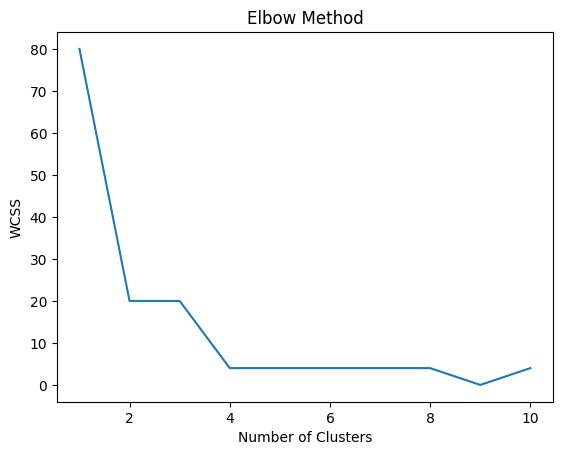

In [58]:
wcss_values = calculate_wcss(data, 10)
plot_elbow(wcss_values)

**Note**: An example graph is shown below:

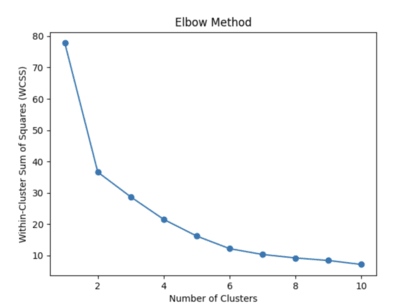